In [1]:
# Create Parameters that will be replated by actions from brain
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy.signal as spsig

In [ ]:
#Original Code
# Create Parameters that will be replated by actions from brain
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import random
Kp =0.9
Ki = 0.1
for i in range(5):
    Kp += 0.001
    Ki += 0.05
    dJ = random.uniform(-0.5,0.5)
    np.array([Kp,Ki,dJ]).astype('double').tofile('binn.bin')
    os.system('engineclosed')
    rpms = sio.loadmat('rpms.mat')
    print((Kp,Ki,dJ))
    plt.plot(rpms['rpms'][0],rpms['rpms'][1],'-.',rpms['rpms'][0],rpms['rpms'][2],'r-.')
    plt.ylabel('test')
    plt.show()




In [ ]:
(Kp, Ki, dJ) = (0.902, 0.2, -0.275) #Decent
#(Kp, Ki, dJ) = (0.905, 0.35, 0.4409342739260588) #Never settled
#(Kp, Ki, dJ) = (0.5, 0.01, 0) #Lower



plt.figure(figsize=[8,4],dpi=100)

np.array([Kp,Ki,dJ]).astype('double').tofile('binn.bin')
os.system('engineclosed')
rpms = sio.loadmat('rpms.mat')
data_df = pd.DataFrame(rpms['rpms'].T, columns=['t','out','targ'])




plt.plot(rpms['rpms'][0],rpms['rpms'][1],rpms['rpms'][0],rpms['rpms'][2],'r-.')
plt.ylabel('test')
plt.show()


In [ ]:
remaining_peaks

In [ ]:
remaining_peaks

In [ ]:
settling_threshold_met.index[i]

In [7]:
settling_threshold_met

5591    False
5767    False
5923    False
6079     True
6225    False
6381     True
6528     True
6684     True
6820     True
6966     True
7102     True
7237     True
7363     True
7466     True
7541     True
7613     True
7655     True
7717     True
7759     True
7821     True
7863     True
7925     True
7967     True
8063     True
8171     True
8213     True
8332     True
8354     True
8365     True
8376     True
8484     True
8516     True
8635     True
8667     True
8786     True
8818     True
8926     True
8958     True
9055     True
9087     True
9195     True
9227     True
9324     True
9356     True
9464     True
9496     True
9593     True
9625     True
9722     True
9754     True
9840     True
9872     True
9969     True
Name: out, dtype: bool

In [9]:
settling_threshold_met

5591    False
5767    False
5923    False
6079     True
6225    False
6381     True
6528     True
6684     True
6820     True
6966     True
7102     True
7237     True
7363     True
7466     True
7541     True
7613     True
7655     True
7717     True
7759     True
7821     True
7863     True
7925     True
7967     True
8063     True
8171     True
8213     True
8332     True
8354     True
8365     True
8376     True
8484     True
8516     True
8635     True
8667     True
8786     True
8818     True
8926     True
8958     True
9055     True
9087     True
9195     True
9227     True
9324     True
9356     True
9464     True
9496     True
9593     True
9625     True
9722     True
9754     True
9840     True
9872     True
9969     True
Name: out, dtype: bool

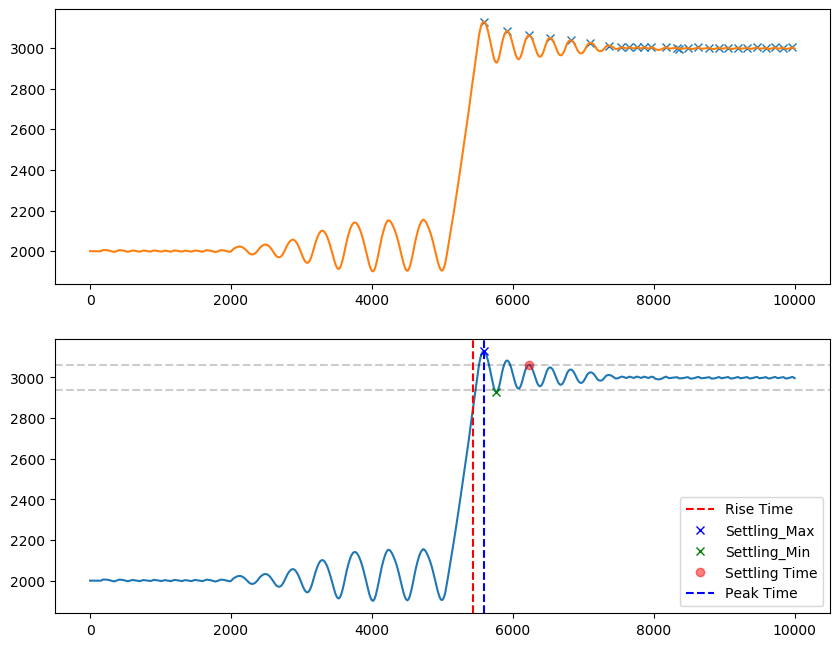

In [12]:
rise_threshold = 0.95
settling_threshold = 0.02
t_start = 5000
y_targ = 3000
y_start = 2000
showplot=True

#Assumptions
#Get peaks and troughs

signal = data_df['out']

#Find peaks, use heuristic filter about t_start
peaks, peak_dict = spsig.find_peaks(signal[t_start:], height=np.mean([y_targ,y_start]))
peaks += t_start

#Find Dip
dips, dips_dict = spsig.find_peaks(-signal) #finding peaks of flipped signal -> dips

#Find Rise Time

rise_time = np.where(np.diff(np.sign(signal-y_targ*rise_threshold)))[0][0]

all_local_min_maxs = sorted(list(dips[dips > t_start])+list(peaks))
#Measure Peaks and Dips
peak_time = peaks[0]
settling_max = signal[peak_time]

dip_time = dips[peaks[0]<dips][0]
settling_min = signal[dip_time]

#Settling Time Detection-------------------------------------------------------------------------------------------
peaks_normalized = np.abs(signal[all_local_min_maxs]/y_targ - 1) #Normalize peaks

settling_threshold_met = (peaks_normalized <= settling_threshold) #Which peaks satisfy settling?

i = len(settling_threshold_met)-1

while (settling_threshold_met.iloc[i] == True) and (i > 0):
    i -= 1
    

signal_normalized = np.abs((signal[t_start:]-y_targ)/y_targ)
settling_time = settling_threshold_met.index[i] #First rise peak that is within settled limits

while signal_normalized[settling_time] <= settling_threshold:
    settling_time -= 1 #work backwards to find settling time
#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

if (showplot):
    plt.figure(figsize=[10,8], dpi=100)

    plt.subplot(211)

    plt.plot(peaks, signal[peaks], "x", label = 'Peaks')
    plt.plot(signal)

    plt.subplot(212)
    plt.plot(signal)

    plt.axvline([rise_time], linestyle = "--", color = 'r', label = "Rise Time")

    plt.plot(peak_time, settling_max, "bx", label = "Settling_Max")
    plt.plot(dip_time, settling_min, "gx", label = "Settling_Min")
    
    plt.plot(settling_time, signal[settling_time], "ro",alpha = 0.5, label = "Settling Time")

    plt.axvline([peak_time], linestyle = "--", color = 'b', label = "Peak Time")

    plt.axhline([y_targ*(1-settling_threshold)], linestyle = "--", color = 'black', alpha = 0.2)
    plt.axhline([y_targ*(1+settling_threshold)], linestyle = "--", color = 'black', alpha = 0.2)



    plt.legend()
    plt.show()

#Make times relative
peak_time -= t_start
settling_time -= t_start
rise_time -= t_start

In [13]:
def extract_waveform_metrics(data_df,
                             rise_threshold = 0.95,
                             settling_threshold = 0.02,
                             t_start = 5000,
                             y_targ = 3000,
                             y_start = 2000,
                             showplot=True):
    #Assumptions
    #Get peaks and troughs

    signal = data_df['out']

    #Find peaks, use heuristic filter about t_start
    peaks, peak_dict = spsig.find_peaks(signal[t_start:], height=np.mean([y_targ,y_start]))
    peaks += t_start

    #Find Dip
    dips, dips_dict = spsig.find_peaks(-signal) #finding peaks of flipped signal -> dips

    #Find Rise Time

    rise_time = np.where(np.diff(np.sign(signal-y_targ*rise_threshold)))[0][0]

    all_local_min_maxs = sorted(list(dips[dips > t_start])+list(peaks))
    #Measure Peaks and Dips
    peak_time = peaks[0]
    settling_max = signal[peak_time]

    dip_time = dips[peaks[0]<dips][0]
    settling_min = signal[dip_time]

    #Settling Time Detection-------------------------------------------------------------------------------------------
    peaks_normalized = np.abs(signal[all_local_min_maxs]/y_targ - 1) #Normalize peaks

    settling_threshold_met = (peaks_normalized <= settling_threshold) #Which peaks satisfy settling?

    i = len(settling_threshold_met)-1

    while (settling_threshold_met.iloc[i] == True) and (i > 0):
        i -= 1


    signal_normalized = np.abs((signal[t_start:]-y_targ)/y_targ)
    settling_time = settling_threshold_met.index[i] #First rise peak that is within settled limits

    while signal_normalized[settling_time] <= settling_threshold:
        settling_time -= 1 #work backwards to find settling time
    #\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

    if (showplot):
        plt.figure(figsize=[10,8], dpi=100)

        plt.subplot(211)

        plt.plot(peaks, signal[peaks], "x", label = 'Peaks')
        plt.plot(signal)

        plt.subplot(212)
        plt.plot(signal)

        plt.axvline([rise_time], linestyle = "--", color = 'r', label = "Rise Time")

        plt.plot(peak_time, settling_max, "bx", label = "Settling_Max")
        plt.plot(dip_time, settling_min, "gx", label = "Settling_Min")

        plt.plot(settling_time, signal[settling_time], "ro",alpha = 0.5, label = "Settling Time")

        plt.axvline([peak_time], linestyle = "--", color = 'b', label = "Peak Time")

        plt.axhline([y_targ*(1-settling_threshold)], linestyle = "--", color = 'black', alpha = 0.2)
        plt.axhline([y_targ*(1+settling_threshold)], linestyle = "--", color = 'black', alpha = 0.2)



        plt.legend()
        plt.show()

    #Make times relative
    peak_time -= t_start
    settling_time -= t_start
    rise_time -= t_start
    
    return peak_time, settling_time, rise_time, settling_min, settling_max

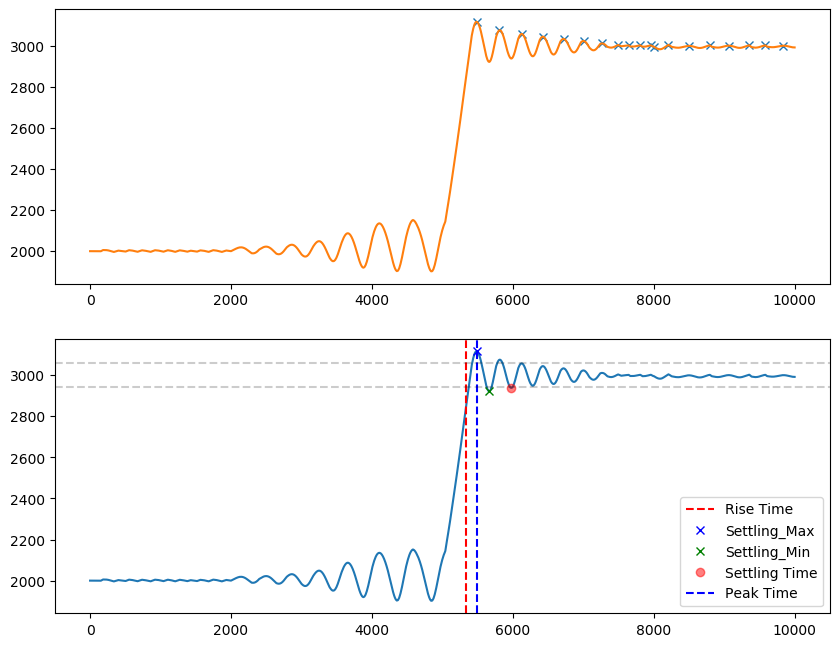

(487, 978, 338, 2920.3927674910187, 3115.866880330747)

In [15]:
(Kp, Ki, dJ) = (0.902, 0.2, -0.275) #Decent
#(Kp, Ki, dJ) = (0.902, 0.3, -0.275) #Decent

#(Kp, Ki, dJ) = (0.905, 0.35, 0.4409342739260588) #Never settled
#(Kp, Ki, dJ) = (0.5, 0.01, 0) #Lower
np.array([Kp,Ki,dJ]).astype('double').tofile('binn.bin')
os.system('engineclosed')
rpms = sio.loadmat('rpms.mat')


data_df = pd.DataFrame(rpms['rpms'].T, columns=['t','out','targ'])
extract_waveform_metrics(data_df)